# This code:
- Makes a stratigraphic chart of the initial and boundary conditions imposed in Wang's models
- Plots the initial and boundary conditions imposed in Wang's models as a map

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Stratigraphic chart 

In [2]:
#Loading time scale
SeriesEpoch=pd.read_table('Series_epoch_boundaries.csv', sep=',')

# Sea-level
#https://www.science.org/doi/10.1126/sciadv.aaz1346
Miller=pd.read_csv('Miller_et_al_2020_sea_level.csv',header=0) 

#Climatic isotopic records
#https://www.science.org/doi/10.1126/science.1059412
Zachos=pd.read_csv('zachos_291121.csv', sep=',', header=0)


# Temperature - Cramer
#https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2011JC007255 
#https://agupubs.onlinelibrary.wiley.com/action/downloadSupplement?doi=10.1029%2F2011JC007255&file=jgrc12191-sup-0016-ts06.txt
temp=pd.read_csv('Cramer_Temperature.txt', sep='\t', header=0, skiprows=[454,486, 487, 488, 489, 490] )


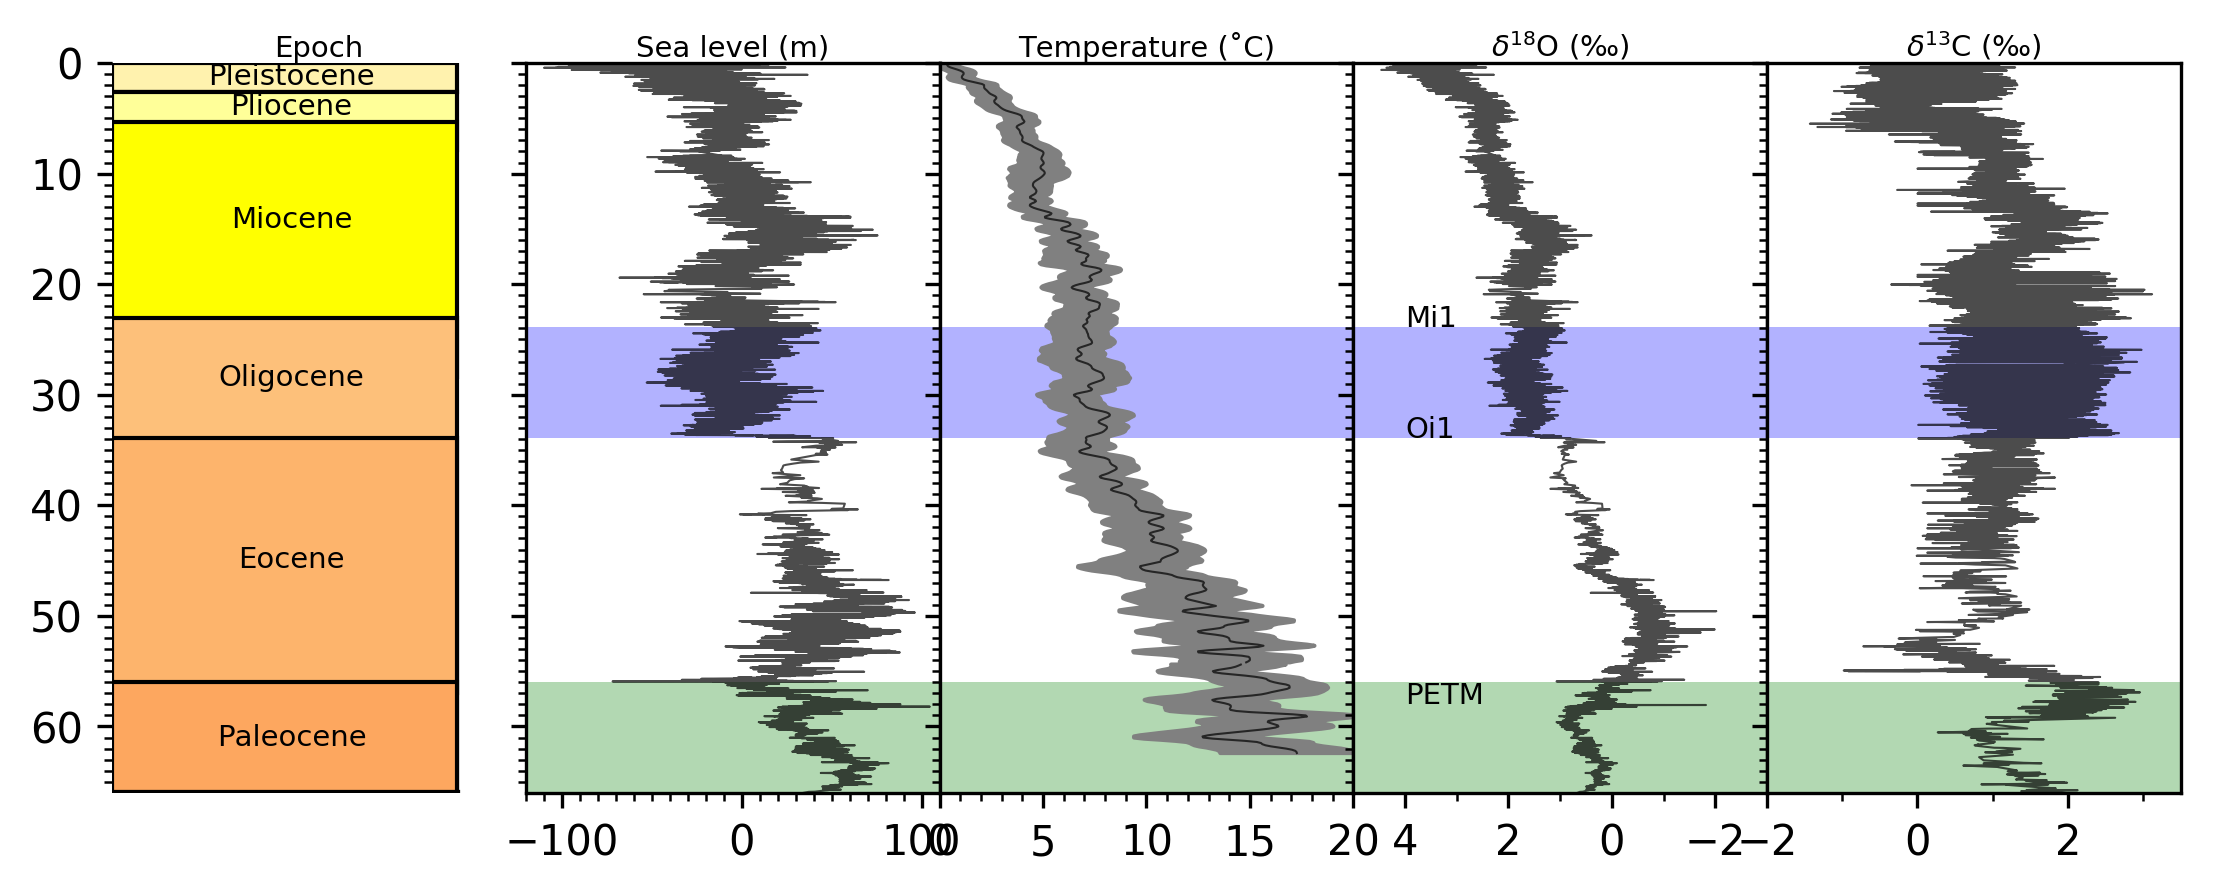

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18/2.5,7/2.5), sharey=True, dpi=300)
plt.rc("font", size=7); plt.rcParams['pdf.fonttype'] = 42; plt.rcParams['ps.fonttype'] = 42


vertmax=int(SeriesEpoch.Series_epoch_value[SeriesEpoch.Series_epoch_name=='L Cretaceous'])
vertdiff=10
v=0
vtext=13
v3=25
c=20
c2=30
r=26

#####################
#Ploting Epoch boxes#
#####################
axes[0].plot(np.linspace(0,c2,5), np.linspace(0,vertmax,5), alpha=0)
for k in np.arange(1,int(np.where(SeriesEpoch.Series_epoch_name=='L Cretaceous')[0])+1,1):
    rect=Rectangle((v, SeriesEpoch.Series_epoch_value[k-1]), 
                       v3,SeriesEpoch.Series_epoch_value[k],
                facecolor=(SeriesEpoch.rse[k-1]/255, SeriesEpoch.gse[k-1]/255, SeriesEpoch.bse[k-1]/255,1), zorder=1, edgecolor='k')
    axes[0].add_patch(rect)
    
    if k<int(np.where(SeriesEpoch.Series_epoch_name=='L Cretaceous')[0]):
        axes[0].text(vtext,((SeriesEpoch.Series_epoch_value [k+1]+SeriesEpoch.Series_epoch_value [k])/2), 
                 SeriesEpoch.Series_epoch_name[k], verticalalignment='center', horizontalalignment='center')#,, rotation=90 verticalalignment='bottom'

    '''
    if k==int(np.where(SeriesEpoch.Series_epoch_name=='L Cretaceous')[0]):
        ax1.text(vtext,SeriesEpoch.Series_epoch_value [k]+2, 
             SeriesEpoch.Series_epoch_name[k], verticalalignment='top', horizontalalignment='center')#,, rotation=90 verticalalignment='bottom'
    '''
#Drawing a line at the bottom of the Paleocene
axes[0].plot([0,v3], [vertmax,vertmax] , color='k')
    
###################
#Ploting sea level#
###################
axes[1].plot(Miller.sea_level_m, Miller.age_ka/1e3, color='k', alpha=0.7, linewidth=0.5)

#####################
#Ploting Temperature#
#####################
axes[2].fill_betweenx(temp.Age,temp['Temperature min'], temp['Temperature max'], color='grey')
axes[2].plot(temp.Temperature,temp.Age, linewidth=0.5,  color='k', alpha=0.7)

#############
#Ploting d18#
#############
axes[3].plot(Miller.oxygen, Miller.age_ka/1e3, color='k', alpha=0.7, linewidth=0.5)
axes[3].text(4,56, 'PETM', verticalalignment='top')
axes[3].text(4,33.9,'Oi1')
axes[3].text(4,23.9,'Mi1')

#############
#Ploting d13#
#############
# to fix the PETM offset to Zachos.Age_Ma+0.9 
axes[4].plot( Zachos.d13C, Zachos.Age_Ma, linewidth=0.5,  color='k', alpha=0.7)

############
#Formatting#
############
IH=[23.9, 23.9, 33.9,33.9]
GH=[56, 56, 66, 66]
ax2_lims=[-120,110,110, -120]
ax3_lims=[0,20,20,0]
ax4_lims=[5,-3,-3, 5]
ax5_lims=[-2, 3.5, 3.5, -2]
ax_lim=[ax2_lims, ax3_lims, ax4_lims, ax5_lims]
sides=['right', 'left', 'top', 'bottom']
plot_title=['Epoch', 'Sea level (m)', 'Temperature (˚C)', '$\delta$$^{18}$O (‰)', '$\delta$$^{13}$C (‰)']

for i in np.arange(0, len(axes),1):
    axes[i].set_title(plot_title[i], fontsize=7, pad=1.5)
    if i==0:
        axes[i].set_yticks(np.arange(0,vertmax,1), minor=True)
        axes[i].set_xticks([])
        axes[i].set_xlim(0,v3+5)
    if i>=1:
        #plotting icehouse and greenhouse#
        axes[i].fill(ax_lim[i-1], GH, facecolor='green', alpha=0.3, edgecolor='none', zorder=0)
        axes[i].fill(ax_lim[i-1], IH, facecolor='blue', alpha=0.3, edgecolor='none', zorder=0)
        axes[i].set_xlim(ax_lim[i-1][0:2])
        axes[i].set_ylim(vertmax,0)
        axes[0].spines[sides[i-1]].set_visible(False)
    if i>=1:
        axes[i].set_xticks(np.arange(ax_lim[i-1][0],ax_lim[i-1][1],10), minor=True)
#         axes[i].tick_params(direction='in')
    if i==2:
        axes[i].set_xticks(np.arange(ax_lim[i-1][0],ax_lim[i-1][1],1), minor=True)
    if i==3:
        axes[i].set_xticks(np.arange(ax_lim[i-1][1],ax_lim[i-1][0],1), minor=True)
#         axes[i].set_xticklabels([ax_lim[i-1][0],ax_lim[i-1][1]])
    if i==4:
        axes[i].set_xticks(np.arange(ax_lim[i-1][0],ax_lim[i-1][1],1), minor=True)

plt.tight_layout(0.1)
plt.subplots_adjust(wspace=0)

fig.savefig('./images/egusphere-2023-53_Fig3d.pdf')
